In [14]:
from scipy.io import loadmat
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential

data = loadmat('/kaggle/input/letters/emnist-letters.mat')

In [15]:
train_images = data['dataset']['train'][0][0]['images'][0][0]
train_labels = data['dataset']['train'][0][0]['labels'][0][0]
test_images = data['dataset']['test'][0][0]['images'][0][0]
test_labels = data['dataset']['test'][0][0]['labels'][0][0]

In [16]:
train_images = train_images.reshape(-1, 28, 28)
test_images  = test_images.reshape(-1, 28, 28)

train_images = train_images.reshape(train_images.shape[0], -1)
test_images  = test_images.reshape(test_images.shape[0], -1)

np.save('X_train.npy', train_images.astype('uint8'))
np.save('y_train.npy', train_labels.ravel().astype('uint8'))
np.save('X_test.npy',  test_images.astype('uint8'))
np.save('y_test.npy',  test_labels.ravel().astype('uint8'))

In [17]:
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')
X_test  = np.load('X_test.npy')
y_test  = np.load('y_test.npy')

In [18]:
print(X_train.shape)
print(y_train.shape)

(124800, 784)
(124800,)


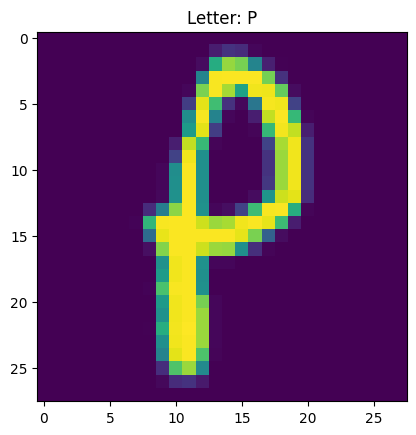

In [19]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2].reshape(28,28).T, cmap='viridis', origin='upper')
plt.title(f"Letter: {chr(y_train[2] + 64)}")  # converts 1→A, 2→B, etc.
plt.show()

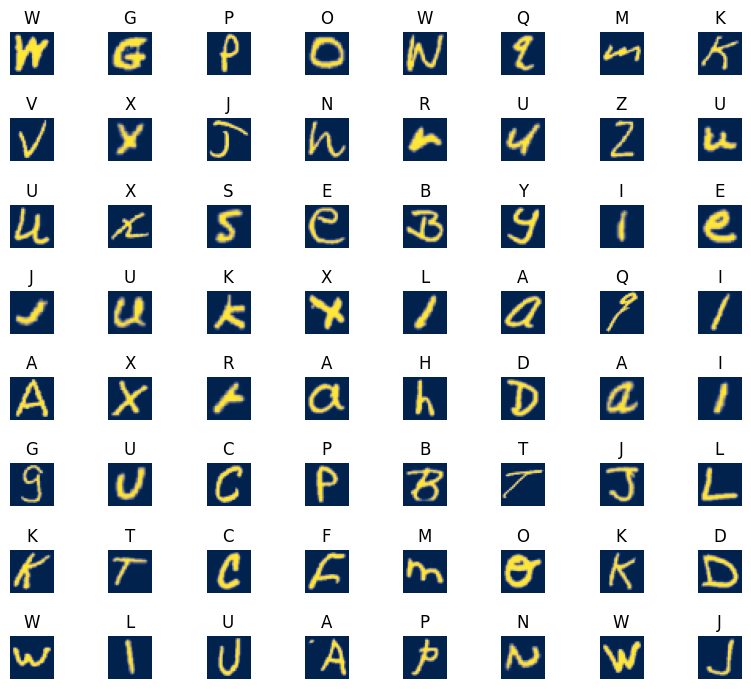

In [20]:
import warnings
warnings.simplefilter(action='ignore',category = FutureWarning)

fig,axes = plt.subplots(8,8,figsize=(8,8))
fig.tight_layout(pad=1,rect =[0,0.03,1,0.91])
for i,ax in enumerate(axes.flat):
    X_reshaped = X_train[i].reshape(28,28).T
    ax.imshow(X_reshaped,cmap = 'cividis')
    ax.set_title(chr(y_train[i]+64))
    ax.set_axis_off()

In [21]:
print(X_train.shape)
print(y_train.shape)

(124800, 784)
(124800,)


In [22]:
tf.random.set_seed(50)

X_train = X_train / 255.0
X_test  = X_test / 255.0

y_train = y_train - 1
y_test  = y_test - 1

model = Sequential([
    tf.keras.Input(shape=(784,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(26), 
])

In [23]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
)


In [24]:

history = model.fit(X_train, y_train, epochs=100, batch_size=128)

Epoch 1/100
975/975 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.1014
Epoch 2/100
975/975 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3947
Epoch 3/100
975/975 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3072
Epoch 4/100
975/975 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2610
Epoch 5/100
975/975 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2292
Epoch 6/100
975/975 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2048
Epoch 7/100
975/975 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1839
Epoch 8/100
975/975 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1668
Epoch 9/100
975/975 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1534
Epoch 10/100
975/975 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1406
Epoch 11/100
975/975 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1313
Epoch 12/100
975/975 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1243
Epoch 13/100
975/975 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1159
Epoch 14/100
975/975 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1111
Epoch 15/100
975/975 ━━━━━━━━━━━━━━━━━━━━ 2

In [25]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 711,632 (2.71 MB)

 Trainable params: 237,210 (926.60 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 474,422 (1.81 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━

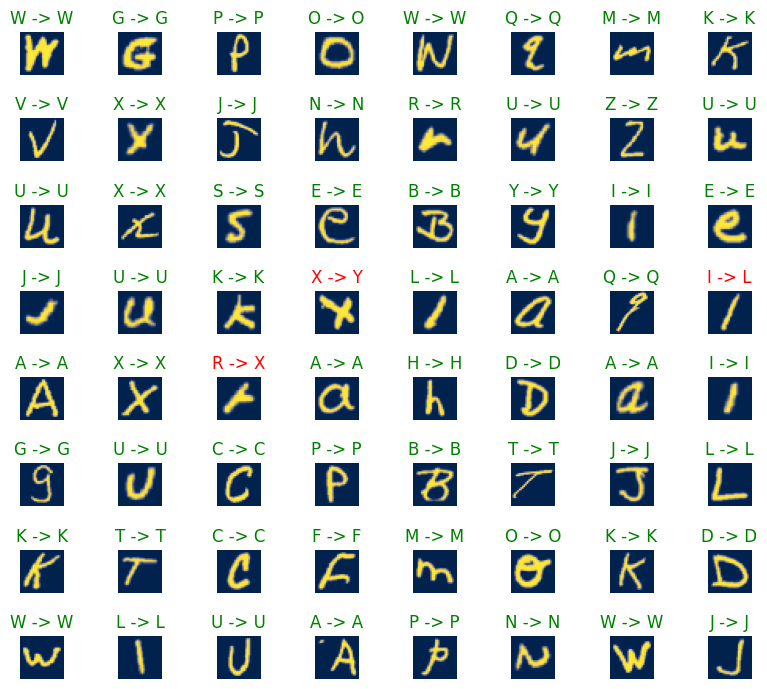

In [26]:
fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=1, rect=[0,0.03,1,0.91])

for i, ax in enumerate(axes.flat):
    # Reshape image
    X_reshaped = X_train[i].reshape(28,28).T
    ax.imshow(X_reshaped, cmap='cividis')
    
    # Predict
    prediction = model.predict(X_train[i].reshape(1,784))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    # True and predicted characters
    true_char = chr(y_train[i] + 65)
    pred_char = chr(yhat + 65)
    
    # Title color
    color = 'green' if y_train[i] == yhat else 'red'
    
    # Set title
    ax.set_title(f"{true_char} -> {pred_char}", fontsize=12, color=color)
    ax.set_axis_off()

plt.show()


In [31]:
train_logits = model.predict(X_train) 
y_train_pred = np.argmax(train_logits, axis=1)

test_logits = model.predict(X_test)
y_test_pred = np.argmax(test_logits, axis=1)


3900/3900 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
650/650 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [32]:
train_errors = np.sum(y_train_pred != y_train)
train_accuracy = 100 * np.sum(y_train_pred == y_train) / len(y_train)


test_errors = np.sum(y_test_pred != y_test)
test_accuracy = 100 * np.sum(y_test_pred == y_test) / len(y_test)

print(f"Train errors: {train_errors} / {len(y_train)} ({100-train_accuracy:.2f}% wrong)")
print(f"Test errors:  {test_errors} / {len(y_test)} ({100-test_accuracy:.2f}% wrong)")


Train errors: 2684 / 124800 (2.15% wrong)
Test errors:  2110 / 20800 (10.14% wrong)


In [36]:
from pathlib import Path

model.save('100epoch_90%accuracy_model.keras')

After looking at Training and Test error We can say The model is overfitting , Because there is a huge gap in training and test error. 
It means it's working good in Training dataset but not so good in test set

### Model Diagnosis: Severe Overfitting

After examining the training and test performance:

The model is **overfitting** upps  

**Reason:**  
almost **7%** gap between **Training Error** (very low) and **Test Error** (much higher)

**means:**  
- Performs **extremely well** on the training dataset  
- Performs **poorly** on the unseen test set  

The model has memorized the training samples .

## Final Verdict 

The model ain’t perfect…  
but damn,
- **90% accuracy** on handwritten letters  

That’s straight-up **clean**   

- 9 out of 10 times it just looks at some messy handwriting and goes:  
“Yeah bro It's A or B” → and it’s right"

## Absolute legend for sticking till the end 🔥
### Thank you

I will try to use more simple Neural Network to reduce overfitting (In future)